In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ANTM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


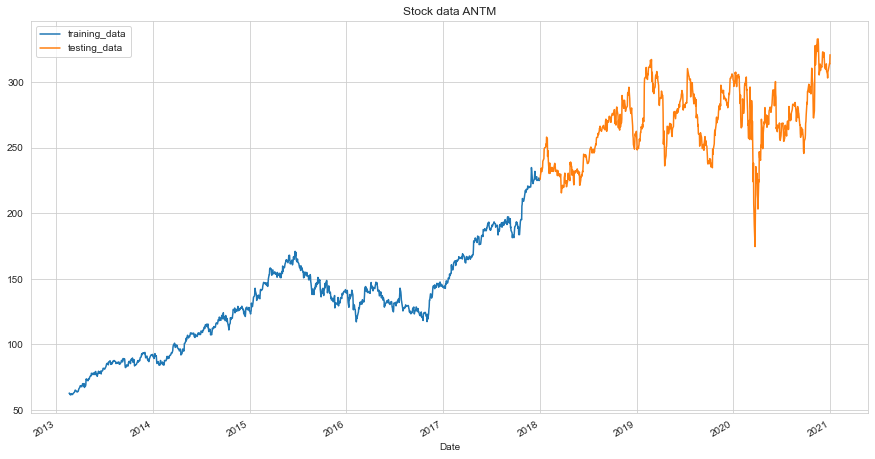

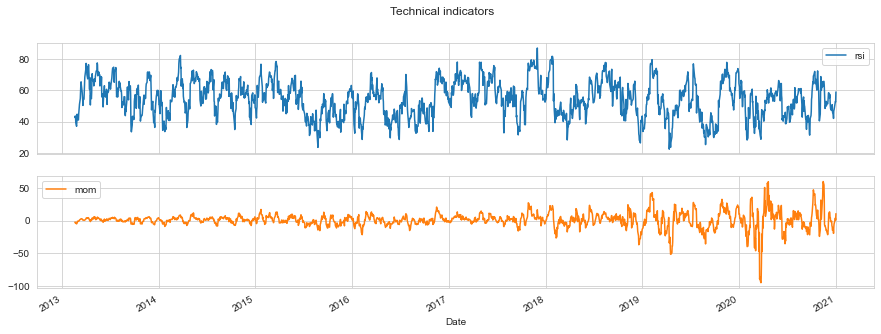

In [2]:
stock_name = 'antm'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1758.78, duration: 0:00:00.181042
episode: 2/2000, episode end value: 1789.71, duration: 0:00:00.157051
episode: 3/2000, episode end value: 1645.56, duration: 0:00:00.158028
episode: 4/2000, episode end value: 1770.01, duration: 0:00:00.177571
episode: 5/2000, episode end value: 1669.94, duration: 0:00:00.177081
episode: 6/2000, episode end value: 1610.75, duration: 0:00:00.191044
episode: 7/2000, episode end value: 1601.32, duration: 0:00:00.181040
episode: 8/2000, episode end value: 1624.23, duration: 0:00:00.197045
episode: 9/2000, episode end value: 1640.25, duration: 0:00:00.204060
episode: 10/2000, episode end value: 1641.83, duration: 0:00:00.197044
episode: 11/2000, episode end value: 1634.65, duration: 0:00:00.201031
episode: 12/2000, episode end value: 1601.14, duration: 0:00:00.208046
episode: 13/2000, episode end value: 1600.57, duration: 0:00:00.211055
episode: 14/2000, episode end value: 1595.53, duration: 0:00:00.214055
episode: 15/200

episode: 117/2000, episode end value: 1650.69, duration: 0:00:00.199054
episode: 118/2000, episode end value: 1753.09, duration: 0:00:00.176039
episode: 119/2000, episode end value: 1680.62, duration: 0:00:00.180035
episode: 120/2000, episode end value: 1663.55, duration: 0:00:00.182047
episode: 121/2000, episode end value: 1683.52, duration: 0:00:00.188042
episode: 122/2000, episode end value: 1690.96, duration: 0:00:00.179039
episode: 123/2000, episode end value: 1770.98, duration: 0:00:00.192037
episode: 124/2000, episode end value: 1674.65, duration: 0:00:00.176047
episode: 125/2000, episode end value: 1682.01, duration: 0:00:00.183041
episode: 126/2000, episode end value: 1631.52, duration: 0:00:00.178040
episode: 127/2000, episode end value: 1646.98, duration: 0:00:00.193038
episode: 128/2000, episode end value: 1760.93, duration: 0:00:00.172044
episode: 129/2000, episode end value: 1673.81, duration: 0:00:00.175040
episode: 130/2000, episode end value: 1622.32, duration: 0:00:00

episode: 232/2000, episode end value: 1652.02, duration: 0:00:00.226049
episode: 233/2000, episode end value: 1744.87, duration: 0:00:00.185063
episode: 234/2000, episode end value: 1758.05, duration: 0:00:00.232033
episode: 235/2000, episode end value: 1680.93, duration: 0:00:00.236053
episode: 236/2000, episode end value: 1639.26, duration: 0:00:00.237053
episode: 237/2000, episode end value: 1755.67, duration: 0:00:00.256060
episode: 238/2000, episode end value: 1760.28, duration: 0:00:00.223046
episode: 239/2000, episode end value: 1806.96, duration: 0:00:00.185039
episode: 240/2000, episode end value: 1686.21, duration: 0:00:00.215064
episode: 241/2000, episode end value: 1712.94, duration: 0:00:00.217036
episode: 242/2000, episode end value: 1630.99, duration: 0:00:00.256059
episode: 243/2000, episode end value: 1678.98, duration: 0:00:00.250056
episode: 244/2000, episode end value: 1688.88, duration: 0:00:00.250060
episode: 245/2000, episode end value: 1781.58, duration: 0:00:00

episode: 346/2000, episode end value: 1768.58, duration: 0:00:00.232051
episode: 347/2000, episode end value: 1673.25, duration: 0:00:00.241053
episode: 348/2000, episode end value: 1677.58, duration: 0:00:00.258060
episode: 349/2000, episode end value: 1727.12, duration: 0:00:00.241052
episode: 350/2000, episode end value: 1768.98, duration: 0:00:00.265061
episode: 351/2000, episode end value: 1635.05, duration: 0:00:00.228070
episode: 352/2000, episode end value: 1763.37, duration: 0:00:00.242037
episode: 353/2000, episode end value: 1653.43, duration: 0:00:00.220046
episode: 354/2000, episode end value: 1766.54, duration: 0:00:00.245053
episode: 355/2000, episode end value: 1648.96, duration: 0:00:00.251056
episode: 356/2000, episode end value: 1658.21, duration: 0:00:00.243055
episode: 357/2000, episode end value: 1763.86, duration: 0:00:00.235054
episode: 358/2000, episode end value: 1661.20, duration: 0:00:00.216045
episode: 359/2000, episode end value: 1643.96, duration: 0:00:00

episode: 460/2000, episode end value: 1650.68, duration: 0:00:00.301071
episode: 461/2000, episode end value: 1674.05, duration: 0:00:00.275061
episode: 462/2000, episode end value: 1647.77, duration: 0:00:00.316068
episode: 463/2000, episode end value: 1677.40, duration: 0:00:00.286067
episode: 464/2000, episode end value: 1707.88, duration: 0:00:00.297067
episode: 465/2000, episode end value: 1676.50, duration: 0:00:00.312071
episode: 466/2000, episode end value: 1647.48, duration: 0:00:00.264061
episode: 467/2000, episode end value: 1665.91, duration: 0:00:00.358080
episode: 468/2000, episode end value: 1687.53, duration: 0:00:00.264065
episode: 469/2000, episode end value: 1649.14, duration: 0:00:00.279062
episode: 470/2000, episode end value: 1687.57, duration: 0:00:00.319069
episode: 471/2000, episode end value: 1641.81, duration: 0:00:00.321074
episode: 472/2000, episode end value: 1651.90, duration: 0:00:00.360083
episode: 473/2000, episode end value: 1630.90, duration: 0:00:00

episode: 574/2000, episode end value: 1609.47, duration: 0:00:00.456104
episode: 575/2000, episode end value: 1606.26, duration: 0:00:00.546127
episode: 576/2000, episode end value: 1602.02, duration: 0:00:00.469105
episode: 577/2000, episode end value: 1608.53, duration: 0:00:00.505115
episode: 578/2000, episode end value: 1615.25, duration: 0:00:00.506110
episode: 579/2000, episode end value: 1605.84, duration: 0:00:00.476108
episode: 580/2000, episode end value: 1603.53, duration: 0:00:00.447093
episode: 581/2000, episode end value: 1605.49, duration: 0:00:00.410091
episode: 582/2000, episode end value: 1606.52, duration: 0:00:00.493089
episode: 583/2000, episode end value: 1606.02, duration: 0:00:00.481106
episode: 584/2000, episode end value: 1606.06, duration: 0:00:00.420095
episode: 585/2000, episode end value: 1612.29, duration: 0:00:00.489112
episode: 586/2000, episode end value: 1604.77, duration: 0:00:00.492115
episode: 587/2000, episode end value: 1614.09, duration: 0:00:00

episode: 688/2000, episode end value: 1617.70, duration: 0:00:00.468100
episode: 689/2000, episode end value: 1631.29, duration: 0:00:00.411097
episode: 690/2000, episode end value: 1616.41, duration: 0:00:00.479107
episode: 691/2000, episode end value: 1644.88, duration: 0:00:00.403091
episode: 692/2000, episode end value: 1677.14, duration: 0:00:00.423096
episode: 693/2000, episode end value: 1711.11, duration: 0:00:00.409041
episode: 694/2000, episode end value: 1662.15, duration: 0:00:00.354078
episode: 695/2000, episode end value: 1651.58, duration: 0:00:00.392091
episode: 696/2000, episode end value: 1631.45, duration: 0:00:00.430094
episode: 697/2000, episode end value: 1637.91, duration: 0:00:00.358085
episode: 698/2000, episode end value: 1618.45, duration: 0:00:00.384093
episode: 699/2000, episode end value: 1622.17, duration: 0:00:00.381087
episode: 700/2000, episode end value: 1644.50, duration: 0:00:00.365083
episode: 701/2000, episode end value: 1630.92, duration: 0:00:00

episode: 802/2000, episode end value: 1635.15, duration: 0:00:00.429099
episode: 803/2000, episode end value: 1636.77, duration: 0:00:00.283064
episode: 804/2000, episode end value: 1646.35, duration: 0:00:00.411094
episode: 805/2000, episode end value: 1672.58, duration: 0:00:00.483147
episode: 806/2000, episode end value: 1627.63, duration: 0:00:00.421742
episode: 807/2000, episode end value: 1634.52, duration: 0:00:00.377083
episode: 808/2000, episode end value: 1637.55, duration: 0:00:00.466105
episode: 809/2000, episode end value: 1638.85, duration: 0:00:00.455918
episode: 810/2000, episode end value: 1703.58, duration: 0:00:00.450939
episode: 811/2000, episode end value: 1708.69, duration: 0:00:00.449786
episode: 812/2000, episode end value: 1660.27, duration: 0:00:00.428096
episode: 813/2000, episode end value: 1699.43, duration: 0:00:00.399090
episode: 814/2000, episode end value: 1643.10, duration: 0:00:00.429096
episode: 815/2000, episode end value: 1663.26, duration: 0:00:00

episode: 916/2000, episode end value: 1773.69, duration: 0:00:00.356698
episode: 917/2000, episode end value: 1772.33, duration: 0:00:00.349982
episode: 918/2000, episode end value: 1643.05, duration: 0:00:00.347080
episode: 919/2000, episode end value: 1682.56, duration: 0:00:00.337077
episode: 920/2000, episode end value: 1762.15, duration: 0:00:00.319071
episode: 921/2000, episode end value: 1762.02, duration: 0:00:00.339076
episode: 922/2000, episode end value: 1642.04, duration: 0:00:00.405636
episode: 923/2000, episode end value: 1704.48, duration: 0:00:00.481033
episode: 924/2000, episode end value: 1682.00, duration: 0:00:00.398088
episode: 925/2000, episode end value: 1752.67, duration: 0:00:00.382086
episode: 926/2000, episode end value: 1685.58, duration: 0:00:00.377086
episode: 927/2000, episode end value: 1671.97, duration: 0:00:00.324075
episode: 928/2000, episode end value: 1664.78, duration: 0:00:00.373084
episode: 929/2000, episode end value: 1679.31, duration: 0:00:00

episode: 1030/2000, episode end value: 1603.64, duration: 0:00:00.497112
episode: 1031/2000, episode end value: 1602.99, duration: 0:00:00.498117
episode: 1032/2000, episode end value: 1603.88, duration: 0:00:00.474103
episode: 1033/2000, episode end value: 1608.07, duration: 0:00:00.493116
episode: 1034/2000, episode end value: 1608.43, duration: 0:00:00.388092
episode: 1035/2000, episode end value: 1601.27, duration: 0:00:00.461101
episode: 1036/2000, episode end value: 1605.15, duration: 0:00:00.467109
episode: 1037/2000, episode end value: 1605.55, duration: 0:00:00.473102
episode: 1038/2000, episode end value: 1605.68, duration: 0:00:00.505116
episode: 1039/2000, episode end value: 1610.81, duration: 0:00:00.424097
episode: 1040/2000, episode end value: 1605.78, duration: 0:00:00.446100
episode: 1041/2000, episode end value: 1604.74, duration: 0:00:00.471108
episode: 1042/2000, episode end value: 1607.42, duration: 0:00:00.415095
episode: 1043/2000, episode end value: 1604.18, dur

episode: 1143/2000, episode end value: 1600.56, duration: 0:00:00.497115
episode: 1144/2000, episode end value: 1597.25, duration: 0:00:00.454103
episode: 1145/2000, episode end value: 1601.32, duration: 0:00:00.422100
episode: 1146/2000, episode end value: 1601.54, duration: 0:00:00.468100
episode: 1147/2000, episode end value: 1607.17, duration: 0:00:00.505117
episode: 1148/2000, episode end value: 1597.22, duration: 0:00:00.461110
episode: 1149/2000, episode end value: 1600.70, duration: 0:00:00.462102
episode: 1150/2000, episode end value: 1599.44, duration: 0:00:00.438104
episode: 1151/2000, episode end value: 1603.76, duration: 0:00:00.375082
episode: 1152/2000, episode end value: 1604.50, duration: 0:00:00.438099
episode: 1153/2000, episode end value: 1596.18, duration: 0:00:00.465106
episode: 1154/2000, episode end value: 1597.43, duration: 0:00:00.447269
episode: 1155/2000, episode end value: 1610.89, duration: 0:00:00.397072
episode: 1156/2000, episode end value: 1607.94, dur

episode: 1256/2000, episode end value: 1759.03, duration: 0:00:00.364085
episode: 1257/2000, episode end value: 1694.93, duration: 0:00:00.357082
episode: 1258/2000, episode end value: 1705.68, duration: 0:00:00.363082
episode: 1259/2000, episode end value: 1760.42, duration: 0:00:00.368080
episode: 1260/2000, episode end value: 1665.17, duration: 0:00:00.384091
episode: 1261/2000, episode end value: 1751.14, duration: 0:00:00.297061
episode: 1262/2000, episode end value: 1757.00, duration: 0:00:00.323074
episode: 1263/2000, episode end value: 1633.10, duration: 0:00:00.378087
episode: 1264/2000, episode end value: 1654.62, duration: 0:00:00.331587
episode: 1265/2000, episode end value: 1666.40, duration: 0:00:00.385411
episode: 1266/2000, episode end value: 1771.48, duration: 0:00:00.400600
episode: 1267/2000, episode end value: 1663.78, duration: 0:00:00.365204
episode: 1268/2000, episode end value: 1657.55, duration: 0:00:00.352080
episode: 1269/2000, episode end value: 1646.55, dur

episode: 1369/2000, episode end value: 1719.33, duration: 0:00:00.366082
episode: 1370/2000, episode end value: 1635.65, duration: 0:00:00.426096
episode: 1371/2000, episode end value: 1633.02, duration: 0:00:00.381086
episode: 1372/2000, episode end value: 1759.48, duration: 0:00:00.308070
episode: 1373/2000, episode end value: 1646.67, duration: 0:00:00.404100
episode: 1374/2000, episode end value: 1679.50, duration: 0:00:00.397757
episode: 1375/2000, episode end value: 1769.39, duration: 0:00:00.417093
episode: 1376/2000, episode end value: 1662.33, duration: 0:00:00.349085
episode: 1377/2000, episode end value: 1758.64, duration: 0:00:00.377004
episode: 1378/2000, episode end value: 1673.96, duration: 0:00:00.341706
episode: 1379/2000, episode end value: 1672.58, duration: 0:00:00.363082
episode: 1380/2000, episode end value: 1761.73, duration: 0:00:00.392092
episode: 1381/2000, episode end value: 1679.86, duration: 0:00:00.347075
episode: 1382/2000, episode end value: 1669.73, dur

episode: 1482/2000, episode end value: 1769.75, duration: 0:00:00.329075
episode: 1483/2000, episode end value: 1646.53, duration: 0:00:00.329065
episode: 1484/2000, episode end value: 1684.23, duration: 0:00:00.436096
episode: 1485/2000, episode end value: 1727.00, duration: 0:00:00.477107
episode: 1486/2000, episode end value: 1700.66, duration: 0:00:00.359079
episode: 1487/2000, episode end value: 1770.22, duration: 0:00:00.431101
episode: 1488/2000, episode end value: 1672.97, duration: 0:00:00.427096
episode: 1489/2000, episode end value: 1693.02, duration: 0:00:00.397089
episode: 1490/2000, episode end value: 1650.76, duration: 0:00:00.448127
episode: 1491/2000, episode end value: 1711.15, duration: 0:00:00.356081
episode: 1492/2000, episode end value: 1784.94, duration: 0:00:00.404091
episode: 1493/2000, episode end value: 1719.29, duration: 0:00:00.278059
episode: 1494/2000, episode end value: 1765.34, duration: 0:00:00.361085
episode: 1495/2000, episode end value: 1676.15, dur

episode: 1595/2000, episode end value: 1648.78, duration: 0:00:00.361082
episode: 1596/2000, episode end value: 1634.32, duration: 0:00:00.442099
episode: 1597/2000, episode end value: 1667.83, duration: 0:00:00.377086
episode: 1598/2000, episode end value: 1768.86, duration: 0:00:00.379086
episode: 1599/2000, episode end value: 1709.59, duration: 0:00:00.415098
episode: 1600/2000, episode end value: 1683.55, duration: 0:00:00.401085
episode: 1601/2000, episode end value: 1710.74, duration: 0:00:00.331075
episode: 1602/2000, episode end value: 1704.21, duration: 0:00:00.363081
episode: 1603/2000, episode end value: 1673.49, duration: 0:00:00.451103
episode: 1604/2000, episode end value: 1759.21, duration: 0:00:00.373081
episode: 1605/2000, episode end value: 1710.11, duration: 0:00:00.385088
episode: 1606/2000, episode end value: 1637.65, duration: 0:00:00.401092
episode: 1607/2000, episode end value: 1677.51, duration: 0:00:00.458100
episode: 1608/2000, episode end value: 1683.45, dur

episode: 1708/2000, episode end value: 1862.42, duration: 0:00:00.288070
episode: 1709/2000, episode end value: 1701.31, duration: 0:00:00.309069
episode: 1710/2000, episode end value: 1720.54, duration: 0:00:00.371085
episode: 1711/2000, episode end value: 1665.45, duration: 0:00:00.447102
episode: 1712/2000, episode end value: 1766.68, duration: 0:00:00.481114
episode: 1713/2000, episode end value: 1691.79, duration: 0:00:00.450107
episode: 1714/2000, episode end value: 1766.76, duration: 0:00:00.483106
episode: 1715/2000, episode end value: 1761.09, duration: 0:00:00.350080
episode: 1716/2000, episode end value: 1639.43, duration: 0:00:00.341082
episode: 1717/2000, episode end value: 1671.24, duration: 0:00:00.433100
episode: 1718/2000, episode end value: 1771.77, duration: 0:00:00.503114
episode: 1719/2000, episode end value: 1684.85, duration: 0:00:00.445099
episode: 1720/2000, episode end value: 1693.02, duration: 0:00:00.460106
episode: 1721/2000, episode end value: 1677.46, dur

episode: 1821/2000, episode end value: 1634.90, duration: 0:00:00.346079
episode: 1822/2000, episode end value: 1635.91, duration: 0:00:00.446100
episode: 1823/2000, episode end value: 1666.11, duration: 0:00:00.444098
episode: 1824/2000, episode end value: 1627.70, duration: 0:00:00.423097
episode: 1825/2000, episode end value: 1639.37, duration: 0:00:00.389088
episode: 1826/2000, episode end value: 1620.12, duration: 0:00:00.325074
episode: 1827/2000, episode end value: 1642.50, duration: 0:00:00.321076
episode: 1828/2000, episode end value: 1640.62, duration: 0:00:00.427097
episode: 1829/2000, episode end value: 1625.67, duration: 0:00:00.390093
episode: 1830/2000, episode end value: 1612.45, duration: 0:00:00.381081
episode: 1831/2000, episode end value: 1672.47, duration: 0:00:00.403091
episode: 1832/2000, episode end value: 1636.63, duration: 0:00:00.457104
episode: 1833/2000, episode end value: 1591.29, duration: 0:00:00.350079
episode: 1834/2000, episode end value: 1637.29, dur

episode: 1934/2000, episode end value: 1636.72, duration: 0:00:00.473105
episode: 1935/2000, episode end value: 1627.74, duration: 0:00:00.414093
episode: 1936/2000, episode end value: 1675.04, duration: 0:00:00.397089
episode: 1937/2000, episode end value: 1659.63, duration: 0:00:00.396091
episode: 1938/2000, episode end value: 1649.77, duration: 0:00:00.486780
episode: 1939/2000, episode end value: 1650.13, duration: 0:00:00.401536
episode: 1940/2000, episode end value: 1634.04, duration: 0:00:00.346077
episode: 1941/2000, episode end value: 1632.47, duration: 0:00:00.390087
episode: 1942/2000, episode end value: 1640.50, duration: 0:00:00.409093
episode: 1943/2000, episode end value: 1641.62, duration: 0:00:00.372083
episode: 1944/2000, episode end value: 1604.31, duration: 0:00:00.335076
episode: 1945/2000, episode end value: 1616.14, duration: 0:00:00.390089
episode: 1946/2000, episode end value: 1662.17, duration: 0:00:00.313071
episode: 1947/2000, episode end value: 1626.16, dur

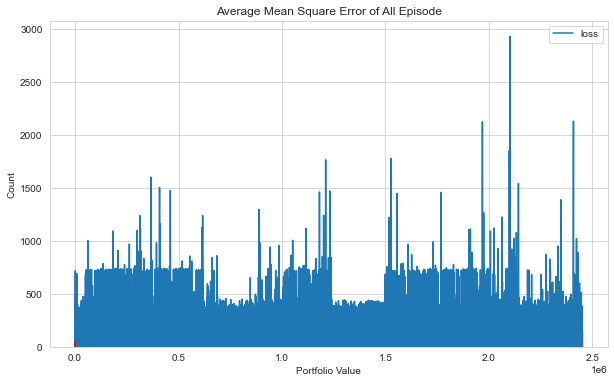

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

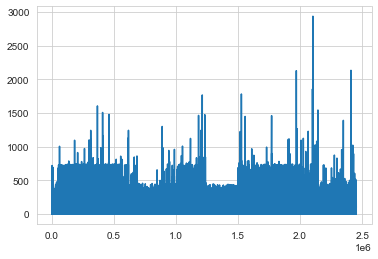

In [5]:
plt.plot(agent.model.losses)

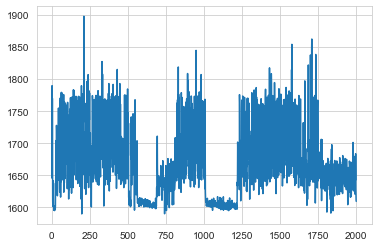

In [6]:
plt.plot(portfolio_value)

episode end value: 1360.55, duration: 0:00:00.219049
Sell: 403 times, Buy: 350 times


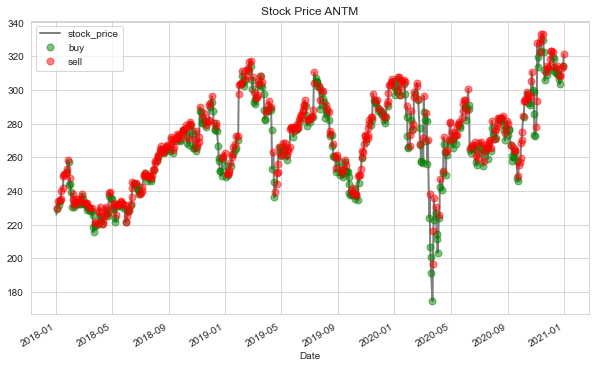

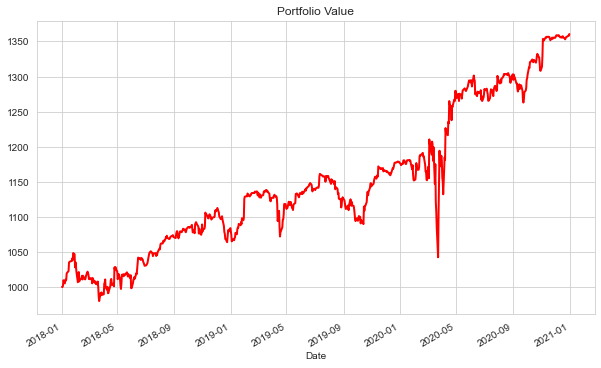

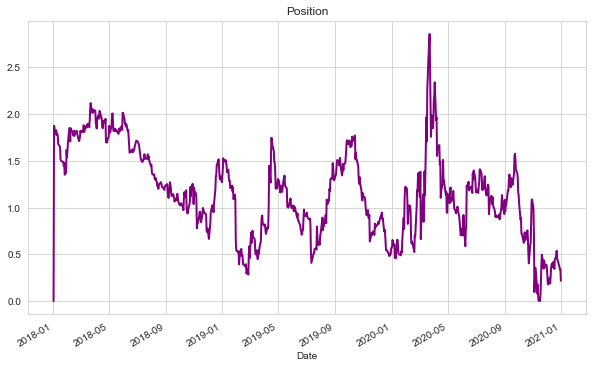

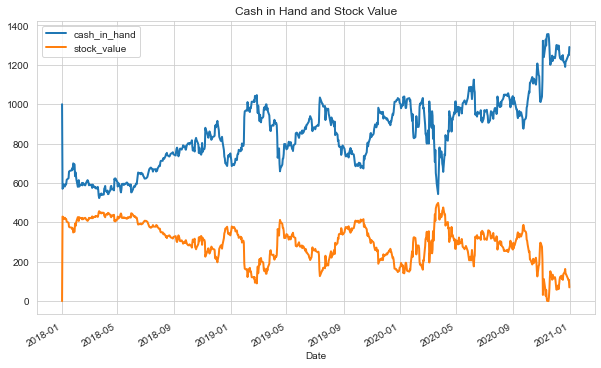

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ANTM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 10.81 %
Volatility: 0.1168
shape ratio: 0.8312
Maximun drawdown: -13.87 %
Calmar ratio: 0.7790
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 12.42 %
Volatility (benchmark): 0.3826
shape ratio: 0.2959
Maximun drawdown: -44.97 %
Calmar ratio (benchmark): 0.2762


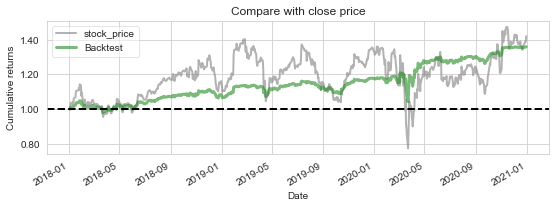

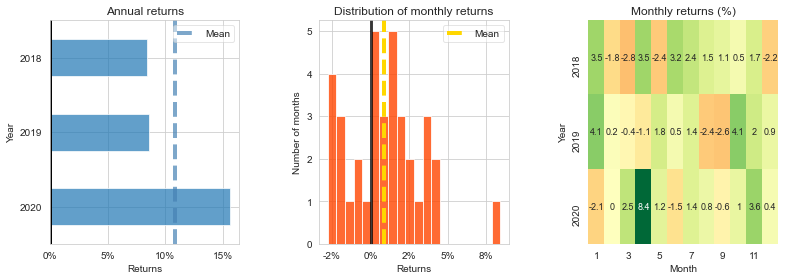

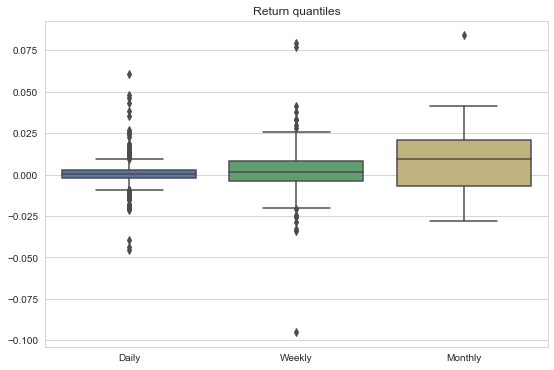

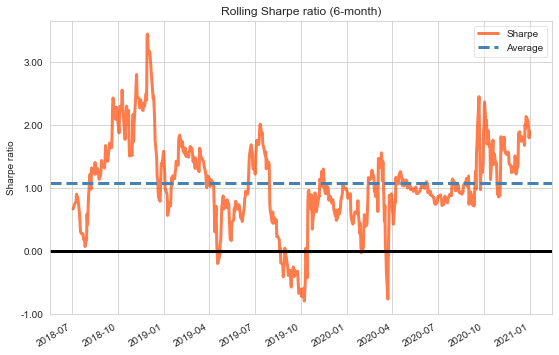

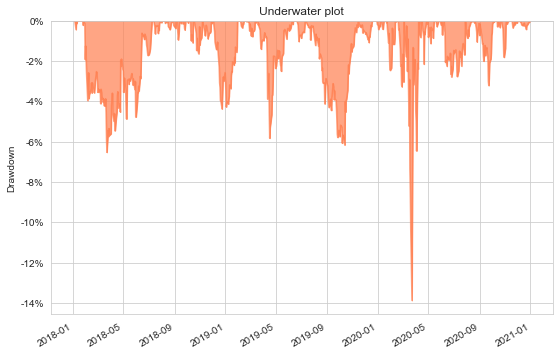

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')